In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.shape

(30, 2)

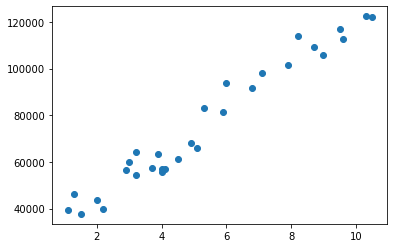

In [6]:
plt.scatter(x='YearsExperience',y='Salary',data=df)

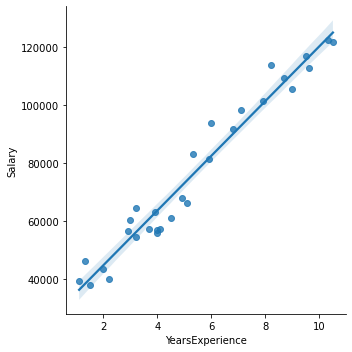

In [7]:
sns.lmplot(x='YearsExperience',y='Salary',data=df)

In [8]:
import statsmodels.formula.api as smf

In [9]:
linear_model=smf.ols(formula='Salary~YearsExperience',data=df)

In [10]:
linear_model=linear_model.fit()

In [11]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
x=df['YearsExperience']
y=df['Salary']

In [13]:
yp=linear_model.predict(x)

In [14]:
yp1=pd.DataFrame(yp)

In [15]:
yp1

,0
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [16]:
df2=pd.DataFrame(data=df)

In [17]:
yp1=pd.DataFrame(yp)

In [18]:
yp1

,0
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [19]:
df['predicted']=yp1

In [20]:
df

,YearsExperience,Salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [21]:
y=df['Salary']

In [22]:
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
print('mean squared error :',mean_squared_error(y,yp1))
print('r2 score :',r2_score(y,yp1))

mean squared error : 31270951.72228097
r2 score : 0.9569566641435086


In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
#logical transformation

In [26]:
x_log=np.log(df['Salary']).values.reshape(-1,1)
y_log=np.log(df['YearsExperience']).values.reshape(-1,1)

In [27]:
log_model=smf.ols(formula='x_log~y_log',data=df).fit()

In [28]:
log_model.params

Intercept    10.328043
y_log         0.562089
dtype: float64

In [29]:
y_pred=log_model.predict(df)

In [36]:
print('mean square error is :',mean_squared_error(x_log,y_pred))
print('r 2 score :',r2_score(x_log,y_pred))

mean square error is : 0.012461413920379636
r 2 score : 0.905215072581715


In [31]:
#sqrt transformation

In [32]:
sqrt_x=(df['Salary']**(1/2)).values.reshape(-1,1)
sqrt_y=(df['YearsExperience']**(1/2)).values.reshape(-1,1)

In [33]:
sqrt_model=smf.ols(formula='sqrt_x~sqrt_y',data=df).fit()

In [34]:
sqrt_model.params

Intercept    103.568031
sqrt_y        75.626932
dtype: float64

In [35]:
y_pred1=sqrt_model.predict(df)

In [37]:
print('mean square error is :',mean_squared_error(sqrt_x,y_pred1))
print('r2 score :',r2_score(sqrt_x,y_pred1))

mean square error is : 138.42356664666698
r2 score : 0.9419490138976825


In [38]:
#resiprocal transformation

In [39]:
rcp_x=(1/df['Salary']).values.reshape(-1,1)
rcp_y=(1/df['YearsExperience']).values.reshape(-1,1)

In [40]:
rcp_model=smf.ols(formula='rcp_x~rcp_y',data=df).fit()

In [41]:
rcp_model.params

Intercept    0.000008
rcp_y        0.000024
dtype: float64

In [42]:
y_pred2=rcp_model.predict(df)

In [43]:
print('mean square error is :',mean_squared_error(rcp_x,y_pred2))
print('r2 score :',r2_score(rcp_x,y_pred2))

mean square error is : 6.722709118686056e-12
r2 score : 0.7703943796970537
